# **Gaussian Distribution Implementation**

## Part 1: Exploring Dataset

In [ ]:
pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import wget

wget.download('https://github.com/aps1070-2019/datasets/raw/master/creditcard.tar.gz','creditcard.tar.gz')

'creditcard.tar (1).gz'

In [ ]:
!tar -zxvf creditcard.tar.gz

creditcard.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
df = pd.read_csv('creditcard.csv')

In [ ]:
df.index

RangeIndex(start=0, stop=284807, step=1)

In [ ]:
len(df.index)

284807

In [ ]:
len(df)

284807

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

In [ ]:
df.loc[df['Class'] == 1]

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279863,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
280143,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
280149,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
281144,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [ ]:
len(df.loc[df['Class'] == 1])

492

In [ ]:
(len(df.loc[df['Class'] == 1]) / len(df)) * 100

0.1727485630620034

In [ ]:
len(df.loc[df['Class'] == 0])

284315

In [ ]:
(len(df.loc[df['Class'] == 0]) / len(df)) * 100

99.82725143693798

In [ ]:
### Split the data  ###
X = df.drop(columns = ['Class']).copy()
y = df['Class']
X_train, X_rem, y_train, y_rem = train_test_split(X,y, train_size=0.65,random_state=40)
X_valid, X_test, y_valid, y_test = train_test_split(X_rem,y_rem, test_size=0.43,random_state=40)




In [ ]:
type(X_train)

pandas.core.frame.DataFrame

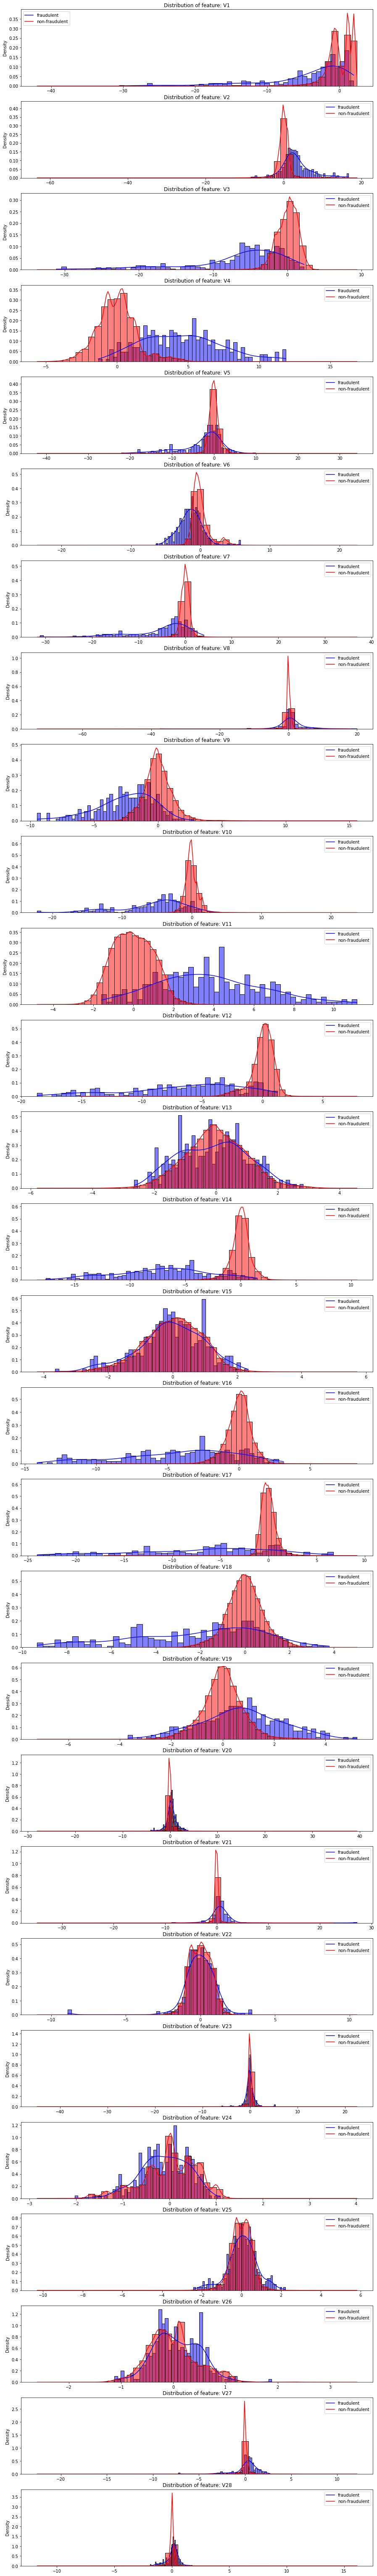

In [ ]:
import matplotlib.gridspec as gridspec
features=[f for f in df.columns if 'V' in f]
nplots=np.size(features)
plt.figure(figsize=(15,4*nplots))
gs = gridspec.GridSpec(nplots,1)
for i, feat in enumerate(features):
    ax = plt.subplot(gs[i])
    sns.histplot(X_train[feat][y_train==1], stat="density", kde=True, color="blue", bins=50)
    sns.histplot(X_train[feat][y_train==0], stat="density", kde=True, color="red", bins=50)
    ax.legend(['fraudulent', 'non-fraudulent'],loc='best')
    ax.set_xlabel('')
    ax.set_title('Distribution of feature: ' + feat)

From the graph we can see the distribution of fradulent and non fradulent classes for each of the features. Few of the features have the distributions very close to each other. Like V23, V25, V26 have fraudent and non fraudent distributions very close to each other. Threfore, these features will not give good predictions. Whereas in some features like V12, V5 the distributions are far away, (i.e) their mean and variance are different. Therefore, these features can be used for learning, and also might give good predictions.

## Part 2: One Gaussian model with Single feature



In [ ]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

column_index = X.columns
column_list = list(column_index)
rm_list = ['Time','Amount']
AUC_training_list = []
AUC_validation_list = []
table = pd.DataFrame()
for item in column_list:
  if item in rm_list:
    column_list.remove(item)
for item in column_list:
  train_data = X_train[item]
  train_data = np.array(train_data)
  train_data = train_data.reshape(-1,1)
  valid_data = X_valid[item]
  valid_data = np.array(valid_data)
  valid_data = valid_data.reshape(-1,1)
  gm = GaussianMixture(n_components=1, covariance_type='full')
  gm.fit(train_data)
  c = gm.score_samples(train_data)
  d = gm.score_samples(valid_data)
  # print ("AUC of {} Component - Training Data".format(item),format(  roc_auc_score(y_train, -1 * c)     , ".3f")  )
  # print ("AUC of {} Component - Validation Data".format(item) , format(  roc_auc_score(y_valid, -1 * d)     , ".3f")  )
  AUC_training_list.append(roc_auc_score(y_train, -1 * c))
  AUC_validation_list.append(roc_auc_score(y_valid, -1 * d))
table['Feature'] = column_list
table['AUC_training'] = AUC_training_list
table['AUC_validation'] = AUC_validation_list
table = table.set_index('Feature')
table.head(28)


,AUC_training,AUC_validation
Feature,,
V1,0.681267,0.738741
V2,0.860191,0.825869
V3,0.866830,0.880402
V4,0.894652,0.915903
V5,0.761584,0.776286
V6,0.723087,0.741754
V7,0.872079,0.847193
V8,0.770833,0.789707
V9,0.803450,0.833086


In [ ]:
print(column_index)

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount'],
      dtype='object')


In [ ]:
(table.loc[table['AUC_validation'].idxmax()]).AUC_training

0.9540231737518073

In [ ]:
best_features = dict()
table1 = table
for i in range(0,3):
  best_features[(table1.loc[table1['AUC_validation'].idxmax()]).name] = [(table1.loc[table1['AUC_validation'].idxmax()]).AUC_validation]
  table1 = table1.drop((table1.loc[table1['AUC_validation'].idxmax()]).name)
print("3 Best Features based on AUC_Validation",best_features)

3 Best Features based on AUC_Validation {'V14': [0.9576284428015246], 'V17': [0.9505548565723596], 'V10': [0.9450072187025635]}


In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
validation_prob_list = list()
training_prob_list = list()
max_f1 = list()
optimal_threshold = list()
AUC_list_tr = list()
AUC_list_val = list()

for key, value in best_features.items():
  train_data = X_train[key]
  train_data = np.array(train_data)
  train_data = train_data.reshape(-1,1)
  gm = GaussianMixture(n_components=1, covariance_type='full')
  gm.fit(train_data)
  d = gm.score_samples(train_data)
  training_prob_list.append(d)
  valid_data = X_valid[key]
  valid_data = np.array(valid_data)
  valid_data = valid_data.reshape(-1,1)
  c = gm.score_samples(valid_data)
  validation_prob_list.append(c)
  AUC_list_tr.append(roc_auc_score(y_train , -1 * d))
  AUC_list_val.append(roc_auc_score(y_valid, -1 * c))
feature_list = list(best_features)

for i in range(0,3):
  f1_list = list()
  tr_list = list()
  print("Feature: ", feature_list[i])
  for j in [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]: 
    tr = sorted(validation_prob_list[i])[j] 
    y_valid = np.array(y_valid)
    precision = precision_score(y_valid, validation_prob_list[i] <= tr) 
    recall = recall_score(y_valid, validation_prob_list[i] <= tr) 
    F1_score = f1_score(y_valid, validation_prob_list[i] <= tr)
    f1_list.append(F1_score)
    tr_list.append(tr)
    print('For  j: ',j, 'threshold of ',tr,' \t precision: ', '%.3f' % precision,' recall: ', '%.3f' % recall,'  f1_score: ', '%.3f' % F1_score) 
  f1 = max(f1_list)
  max_f1.append(f1)
  index = f1_list.index(f1)
  optimal_threshold.append(tr_list[index])

precision_v = list()
precision_t  = list()
recall_v = list()
recall_t =  list()
f1_v = list()
f1_t = list()

for i in range(0,3):
  tr = optimal_threshold[i]
  precision_v.append(precision_score(y_valid, validation_prob_list[i] <= tr)) 
  precision_t.append(precision_score(y_train, training_prob_list[i] <= tr)) 
  recall_v.append(recall_score(y_valid, validation_prob_list[i] <= tr))  
  recall_t.append(recall_score(y_train, training_prob_list[i] <= tr))
  f1_v.append(f1_score(y_valid, validation_prob_list[i] <= tr))
  f1_t.append(f1_score(y_train, training_prob_list[i] <= tr))

tr_table = pd.DataFrame()
tr_table['Feature'] = feature_list
tr_table['Optimal Threshold'] = optimal_threshold
tr_table['AUC (Training)'] = AUC_list_tr
tr_table['AUC (Validation)'] = AUC_list_val
tr_table['Precision (Training)'] = precision_t
tr_table['Precision (Validation)'] = precision_v
tr_table['Recall (Training)'] = recall_t
tr_table['Recall (Validation)'] = recall_v
tr_table['F1 Score (Training)'] = f1_t
tr_table['F1 Score (Validation)'] = f1_v
# tr_table = tr_table.set_index('Feature')
#print(AUC_list_tr)

Feature:  V14
For  j:  1 threshold of  -193.12553175721004  	 precision:  1.000  recall:  0.021   f1_score:  0.041
For  j:  10 threshold of  -92.96232413110762  	 precision:  1.000  recall:  0.116   f1_score:  0.208
For  j:  20 threshold of  -66.13815222134427  	 precision:  0.952  recall:  0.211   f1_score:  0.345
For  j:  30 threshold of  -45.73689132562261  	 precision:  0.935  recall:  0.305   f1_score:  0.460
For  j:  40 threshold of  -36.91190266975152  	 precision:  0.902  recall:  0.389   f1_score:  0.544
For  j:  50 threshold of  -32.02228725009258  	 precision:  0.804  recall:  0.432   f1_score:  0.562
For  j:  60 threshold of  -27.567163572912488  	 precision:  0.738  recall:  0.474   f1_score:  0.577
For  j:  70 threshold of  -21.881396827126324  	 precision:  0.746  recall:  0.558   f1_score:  0.639
For  j:  80 threshold of  -19.941651239500636  	 precision:  0.691  recall:  0.589   f1_score:  0.636
For  j:  90 threshold of  -19.134227953309452  	 precision:  0.637  recall

In [ ]:
tr_table.head()

,Feature,Optimal Threshold,AUC (Training),AUC (Validation),Precision (Training),Precision (Validation),Recall (Training),Recall (Validation),F1 Score (Training),F1 Score (Validation)
0,V14,-21.881397,0.954023,0.957628,0.653285,0.746479,0.554180,0.557895,0.599665,0.638554
1,V17,-21.910442,0.927781,0.950555,0.663934,0.732394,0.501548,0.547368,0.571429,0.626506
2,V10,-51.692516,0.913807,0.945007,0.408759,0.333333,0.173375,0.178947,0.243478,0.232877


One way to find the threshold without going through all the values is to use the histogram to plot the values and find the ideal threshold from that which will have constant Big O complexity.

In [ ]:
optimal_threshold

[-21.881396827126324, -21.910442248577894, -51.69251563863542]

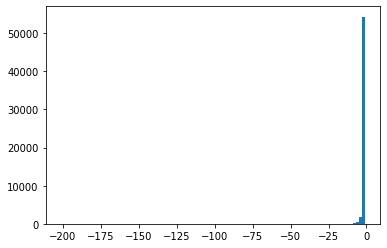

In [ ]:
_ = plt.hist (validation_prob_list[0] , bins = 100)

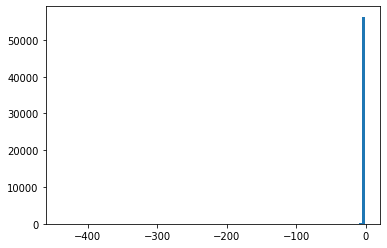

In [ ]:
_ = plt.hist (validation_prob_list[1] , bins = 100)

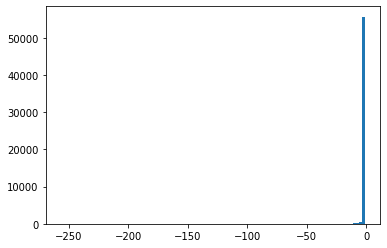

In [ ]:
_ = plt.hist (validation_prob_list[2] , bins = 100)

In [ ]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import roc_auc_score

AUC_tr_list = []
AUC_val_list = []
v_precision = list()
t_precision  = list()
v_recall = list()
t_recall =  list()
v_f1 = list()
t_f1 = list()
val_prob_list = list()
train_prob_list = list()

n_table = pd.DataFrame()
for item in feature_list:
  train_data =X_train[item][y_train==0]
  train_data = np.array(train_data)
  train_data = train_data.reshape(-1,1)
  gm = GaussianMixture(n_components=1, covariance_type='full')
  gm.fit(train_data)
  c = gm.score_samples(X_train[item].values.reshape(-1,1))
  train_prob_list.append(c)
  d = gm.score_samples(X_valid[item].values.reshape(-1,1))
  val_prob_list.append(d)
  AUC_tr_list.append(roc_auc_score(y_train , -1 * c))
  AUC_val_list.append(roc_auc_score(y_valid, -1 * d))

for i in range(0,3):
  v_precision.append(precision_score(y_valid,  val_prob_list[i] <= optimal_threshold[i])) 
  t_precision.append(precision_score(y_train, train_prob_list[i] <= optimal_threshold[i])) 
  v_recall.append(recall_score(y_valid, val_prob_list[i] <= optimal_threshold[i]))  
  t_recall.append(recall_score(y_train, train_prob_list[i] <= optimal_threshold[i]))
  v_f1.append(f1_score(y_valid, val_prob_list[i] <= optimal_threshold[i]))
  t_f1.append(f1_score(y_train, train_prob_list[i] <= optimal_threshold[i]))


n_table['Feature'] = feature_list
n_table['AUC (Training)'] = AUC_tr_list
n_table['AUC (Validation)'] = AUC_val_list
n_table['Precision (Training)'] = t_precision
n_table['Precision (Validation)'] = v_precision
n_table['Recall (Training)'] = t_recall
n_table['Recall (Validation)'] = v_recall
n_table['F1 Score (Training)'] = t_f1
n_table['F1 Score (Validation)'] = v_f1
#n_table = n_table.set_index('Feature')



In [ ]:
n_table.head()

,Feature,AUC (Training),AUC (Validation),Precision (Training),Precision (Validation),Recall (Training),Recall (Validation),F1 Score (Training),F1 Score (Validation)
0,V14,0.954344,0.957454,0.621795,0.666667,0.600619,0.610526,0.611024,0.637363
1,V17,0.927021,0.950644,0.592834,0.591837,0.563467,0.610526,0.577778,0.601036
2,V10,0.913869,0.945124,0.347826,0.288136,0.173375,0.178947,0.231405,0.220779


In [ ]:
tr1 = tr_table.copy()
tr1 = tr1.drop(columns='Optimal Threshold')

In [ ]:
tr1.compare(n_table, keep_shape=True, keep_equal=True)

Feature       AUC (Training)           AUC (Validation)            \
     self other           self     other             self     other   
0     V14   V14       0.954023  0.954344         0.957628  0.957454   
1     V17   V17       0.927781  0.927021         0.950555  0.950644   
2     V10   V10       0.913807  0.913869         0.945007  0.945124   

  Precision (Training)           Precision (Validation)            \
                  self     other                   self     other   
0             0.653285  0.621795               0.746479  0.666667   
1             0.663934  0.592834               0.732394  0.591837   
2             0.408759  0.347826               0.333333  0.288136   

  Recall (Training)           Recall (Validation)            \
               self     other                self     other   
0          0.554180  0.600619            0.557895  0.610526   
1          0.501548  0.563467            0.547368  0.610526   
2          0.173375  0.173375            0.178947  0.178947   

  F1 Score (Training)           F1 Score (Validation)            
                 self     other                  self     other  
0            0.599665  0.611024              0.638554  0.637363  
1            0.571429  0.577778              0.626506  0.601036  
2            0.243478  0.231405              0.232877  0.220779

From the table, we can find that most of the values vary only by small decimal and overall remain same.
This is because of the biased dataset, where we have only 0.17% of fraudulent data. 

## **Part 3: One Gaussian model with multiple features**


In [ ]:
X_train['V1'][y_train==0].values

array([ 0.97971412,  0.8810244 , -0.9301489 , ...,  0.94288332,
       -0.53153617, -0.60409411])

In [ ]:
def graph_plot(feature_names,X_train,y_train):
  f1 = X_train[feature_names[0]].values
  f2 = X_train[feature_names[1]].values
  non_fraud_f1 = X_train[feature_names[0]][y_train==0].values
  non_fraud_f2 = X_train[feature_names[1]][y_train==0].values
  fraud_f1 = X_train[feature_names[0]][y_train==1].values
  fraud_f2 = X_train[feature_names[1]][y_train==1].values
  plt.scatter(non_fraud_f1,non_fraud_f2, color = 'blue', marker='x')
  plt.scatter(fraud_f1,fraud_f2, color = 'red', marker='x')
  plt.title('{} vs {}'.format(feature_names[0],feature_names[1]))
  plt.xlabel(feature_names[0])
  plt.ylabel(feature_names[1])
  plt.show()

In [ ]:
def auc_score(n,feature_names, X_train,X_valid,y_train, y_valid):
  gm = GaussianMixture(n_components=n, covariance_type='full')
  gm.fit(X_train.loc[:,feature_names].values)
  c = gm.score_samples(X_train.loc[:,feature_names].values)
  d = gm.score_samples(X_valid.loc[:,feature_names].values)
  AUC_tr = (roc_auc_score(y_train , -1 * c))
  AUC_val = (roc_auc_score(y_valid, -1 * d))
  print('Feature {} & {}'.format(feature_names[0],feature_names[1]))
  print('AUC (Training):', AUC_tr)
  print('AUC (Validation):', AUC_val)
  
  


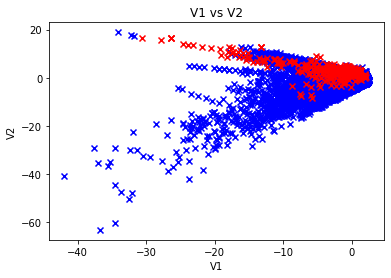

In [ ]:
feature_names = ['V1','V2']
graph_plot(feature_names,X_train,y_train)

In this comparison between Feature 1 and Feature 2, number of components (n_components) is assumed to be 1

In [ ]:
auc_score(1,feature_names, X_train,X_valid,y_train, y_valid)

Feature V1 & V2
AUC (Training): 0.8548943861846001
AUC (Validation): 0.84917532354262


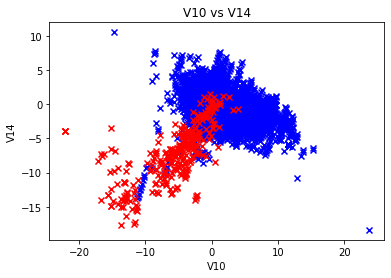

In [ ]:
feature_names = ['V10','V14']
graph_plot(feature_names,X_train,y_train)

In this comparison between Feature 10 and Feature 14, number of components (n_components) is assumed to be 2

In [ ]:
auc_score(2,feature_names, X_train,X_valid,y_train, y_valid)

Feature V10 & V14
AUC (Training): 0.9524660976212334
AUC (Validation): 0.9759967933372674


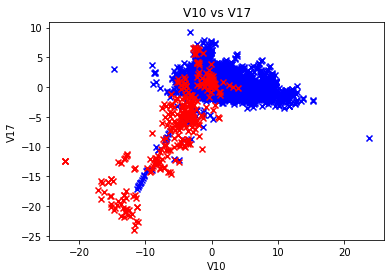

In [ ]:
feature_names = ['V10','V17']
graph_plot(feature_names,X_train,y_train)

In this comparison between Feature 10 and Feature 17, number of components (n_components) is assumed to be 2

In [ ]:
auc_score(2,feature_names, X_train,X_valid,y_train, y_valid)

Feature V10 & V17
AUC (Training): 0.95290593146275
AUC (Validation): 0.9790902579062423


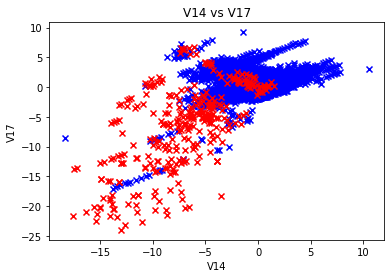

In [ ]:
feature_names = ['V14','V17']
graph_plot(feature_names,X_train,y_train)

In this comparison between Feature 14 and Feature 17, number of components (n_components) is assumed to be 2

In [ ]:
auc_score(2,feature_names, X_train,X_valid,y_train, y_valid)

Feature V14 & V17
AUC (Training): 0.960226130951706
AUC (Validation): 0.9754209672690293


Out of the 4 pairs V10 and V17 has the highest AUC for the validation set : 0.979087

In [ ]:
feature_names = ['V10','V17']
f1_list = list()
tr_list = list()
gm = GaussianMixture(n_components=2, covariance_type='full')
gm.fit(X_train.loc[:,feature_names].values)
c = gm.score_samples(X_train.loc[:,feature_names].values)
d = gm.score_samples(X_valid.loc[:,feature_names].values)
for j in [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]: 
  tr = sorted(d)[j] 
  y_valid = np.array(y_valid)
  F1_score_val = f1_score(y_valid, d <= tr)
  F1_score_tr = f1_score(y_train, c <= tr)
  f1_list.append(F1_score_val)
  tr_list.append(tr)
  #print('For  j: ',j, 'threshold of ',tr,'  f1_score: ', '%.3f' % F1_score_val) 
f1 = max(f1_list)
index = f1_list.index(f1)
threshold = tr_list[index]
print("Max F1 Score:",f1)
print("Optimal Threshold:", threshold)

Max F1 Score: 0.5616438356164384
Optimal Threshold: -12.941272994023006


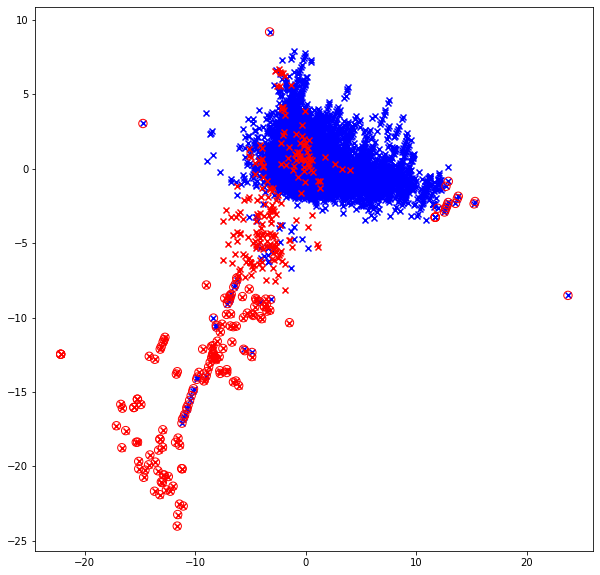

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_train[feature_names[0]][y_train==0].values,X_train[feature_names[1]][y_train==0].values,c='b',cmap='viridis',marker='x')
plt.scatter(X_train[feature_names[0]][y_train==1].values,X_train[feature_names[1]][y_train==1].values,c='r',cmap='viridis',marker='x')

outliers = np.nonzero(c<threshold)
plt.scatter(X_train[feature_names[0]].iloc[outliers],X_train[feature_names[1]].iloc[outliers],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

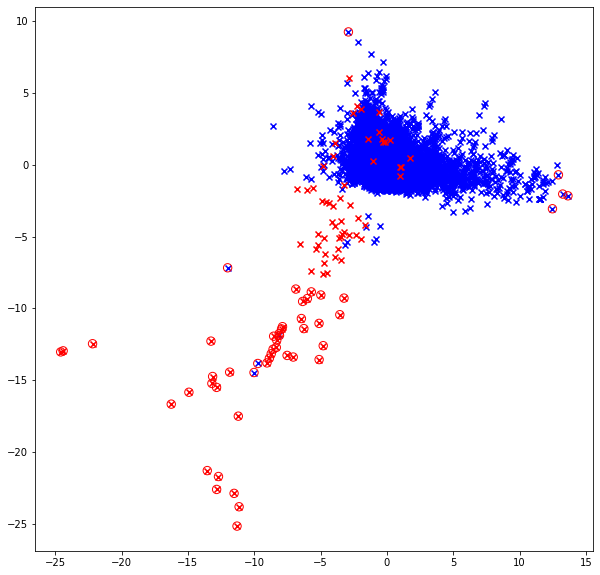

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(X_valid[feature_names[0]][y_valid==0].values,X_valid[feature_names[1]][y_valid==0].values,c='b',cmap='viridis',marker='x')
plt.scatter(X_valid[feature_names[0]][y_valid==1].values,X_valid[feature_names[1]][y_valid==1].values,c='r',cmap='viridis',marker='x')

outliers = np.nonzero(d<threshold)
plt.scatter(X_valid[feature_names[0]].iloc[outliers],X_valid[feature_names[1]].iloc[outliers],marker="o",facecolor= "none",edgecolor="r",s=70)
plt.show()

In [ ]:
###You can use the following function for 3D plotting in part b  ###


from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

def plot_3d(X_train , y_train, f1, f2, f3, angle ):
  X_train_3f = pd.DataFrame(data = X_train,columns=[f1, f2,f3])
  fig = plt.figure()
  ax = plt.axes( projection='3d')
  ax.scatter3D(X_train_3f[f1][y_train==0], X_train_3f[f2][y_train==0], X_train_3f[f3][y_train==0], c='b', marker='x',label ='Non-fraud')
  ax.scatter3D(X_train_3f[f1][y_train==1], X_train_3f[f2][y_train==1], X_train_3f[f3][y_train==1], c='r', marker='o',label="Fraud")
  ax.set_xlabel(f1)
  ax.set_ylabel(f2)
  ax.set_zlabel(f3)
  plt.legend()
  ax.view_init(30, angle)
  plt.show()


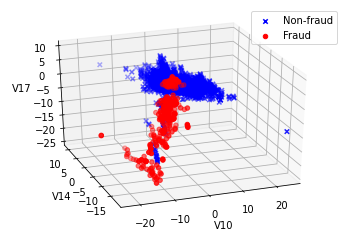

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=250 ) # Replace V0 with desired features. Also, you can try different values of angle to see the plot from different angles

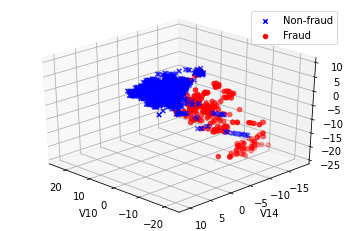

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=135 )

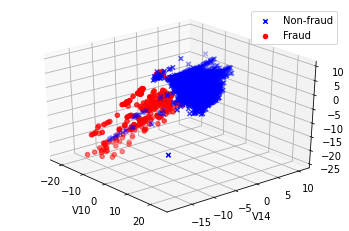

In [ ]:
plot_3d(X_train, y_train, f1="V10", f2="V14", f3="V17", angle=320 )

In [ ]:
feature_names = ['V10','V14','V17']
f1_list = list()
tr_list = list()
gm = GaussianMixture(n_components=2, covariance_type='full')
gm.fit(X_train.loc[:,feature_names].values)
c = gm.score_samples(X_train.loc[:,feature_names].values)
d = gm.score_samples(X_valid.loc[:,feature_names].values)
AUC_tr = (roc_auc_score(y_train , -1 * c))
AUC_val = (roc_auc_score(y_valid, -1 * d))
print('Feature {}, {} & {}'.format(feature_names[0],feature_names[1],feature_names[2]))
print('AUC (Training):', AUC_tr)
print('AUC (Validation):', AUC_val)

for j in [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]: 
  tr = sorted(d)[j] 
  y_valid = np.array(y_valid)
  F1_score_val = f1_score(y_valid, d <= tr)
  F1_score_tr = f1_score(y_train, c <= tr)
  f1_list.append(F1_score_val)
  tr_list.append(tr)
  #print('For  j: ',j, 'threshold of ',tr,'  f1_score: ', '%.3f' % F1_score_val) 
f1 = max(f1_list)
index = f1_list.index(f1)
threshold = tr_list[index]
print("Max F1 Score:",f1)
print("Optimal Threshold:", threshold)


Feature V10, V14 & V17
AUC (Training): 0.9593993190533142
AUC (Validation): 0.9809266661470686
Max F1 Score: 0.6075949367088607
Optimal Threshold: -17.379102324807572


## Part 4:  Two Gaussian model with single feature


In [ ]:
g1 = GaussianMixture(n_components=1, covariance_type='full')
g1.fit(X_train['V1'][y_train==0].values.reshape(-1,1))
g2 = GaussianMixture(n_components=1, covariance_type='full')
g2.fit(X_train['V1'][y_train==1].values.reshape(-1,1))
valid_data = X_valid['V1']
valid_data = np.array(valid_data)
valid_data = valid_data.reshape(-1,1)
s1 = g1.score_samples(valid_data)
s2 = g2.score_samples(valid_data)
test = np.linspace(0,10,101)
test = list(test)
f1_l = list()
for i in test:
  F1_score = f1_score(y_valid, s1 <= i * s2)
  f1_l.append(F1_score)
f1 = max(f1_l)
index = f1_l.index(f1)
optimal_c = test[index]
print("Max F1 Score:",f1)
print("Optimal C:", optimal_c)

Max F1 Score: 0.16216216216216217
Optimal C: 8.5


In [ ]:
list_f1_val = list()
list_c_val = list()
list_f1_tr = list()
list_precision_tr = list()
list_precision_val = list()
list_recall_tr = list()
list_recall_val = list()
auc_l = list()
auc_l_s1 = list()
for item in column_list:
  g1 = GaussianMixture(n_components=1, covariance_type='full')
  g1.fit(X_train[item][y_train==0].values.reshape(-1,1))
  g2 = GaussianMixture(n_components=1, covariance_type='full')
  g2.fit(X_train[item][y_train==1].values.reshape(-1,1))
  valid_data = X_valid[item]
  valid_data = np.array(valid_data)
  valid_data = valid_data.reshape(-1,1)
  s1_val = g1.score_samples(valid_data)
  s2_val = g2.score_samples(valid_data)
  test = np.linspace(0,10,101)
  test = list(test)
  f1_l = list()
  for i in test:
    F1_score = f1_score(y_valid, s1_val <= i * s2_val)
    f1_l.append(F1_score)
  f1 = max(f1_l)
  list_f1_val.append(f1)
  index = f1_l.index(f1)
  optimal_c = test[index]
  list_c_val.append(optimal_c)
  # print("Max F1 Score:",f1)
  # print("Optimal C:", optimal_c)
  list_precision_val.append(precision_score(y_valid, s1_val <= optimal_c * s2_val)) 
  list_recall_val.append(recall_score(y_valid, s1_val <= optimal_c * s2_val)) 
  auc_l.append(roc_auc_score(y_valid, -1 * s2_val))
  auc_l_s1.append(roc_auc_score(y_valid, -1 * s1_val))

In [ ]:
list_c_tr = list()
auc_tr = list()
auc_tr_s1 = list()
for item in column_list:
  g1 = GaussianMixture(n_components=1, covariance_type='full')
  g1.fit(X_train[item][y_train==0].values.reshape(-1,1))
  g2 = GaussianMixture(n_components=1, covariance_type='full')
  g2.fit(X_train[item][y_train==1].values.reshape(-1,1))
  train_data = X_train[item]
  train_data = np.array(train_data)
  train_data = train_data.reshape(-1,1)
  s1_tr = g1.score_samples(train_data)
  s2_tr = g2.score_samples(train_data)
  test = np.linspace(0,10,101)
  test = list(test)
  f1_l = list()
  for i in test:
    F1_score = f1_score(y_train, s1_tr <= i * s2_tr)
    f1_l.append(F1_score)
  f1 = max(f1_l)
  list_f1_tr.append(f1)
  index = f1_l.index(f1)
  optimal_c = test[index]
  list_c_tr.append(optimal_c)
  # print("Max F1 Score:",f1)
  # print("Optimal C:", optimal_c)
  list_precision_tr.append(precision_score(y_train, s1_tr <= optimal_c * s2_tr))
  list_recall_tr.append(recall_score(y_train, s1_tr <= optimal_c * s2_tr)) 
  auc_tr.append(roc_auc_score(y_train, -1 * s2_tr))
  auc_tr_s1.append(roc_auc_score(y_train, -1 * s1_tr))

In [ ]:
f_table = pd.DataFrame()
f_table['Feature'] = column_list
f_table['Optimal C (Training)'] = list_c_tr
f_table['Optimal C (Validation)'] = list_c_val
f_table['Precision (Training)'] = list_precision_tr
f_table['Precision (Validation)'] = list_precision_val
f_table['Recall (Training)'] = list_recall_tr
f_table['Recall (Validation)'] = list_recall_val
f_table['F1 Score (Training)'] = list_f1_val
f_table['F1 Score (Validation)'] = list_f1_tr

In [ ]:
f_table.head(28)

,Feature,Optimal C (Training),Optimal C (Validation),Precision (Training),Precision (Validation),Recall (Training),Recall (Validation),F1 Score (Training),F1 Score (Validation)
0,V1,6.1,8.5,0.110818,0.226415,0.130031,0.126316,0.162162,0.119658
1,V2,4.5,5.7,0.208333,0.800000,0.108359,0.126316,0.218182,0.142566
2,V3,6.2,9.6,0.308824,0.477273,0.260062,0.221053,0.302158,0.282353
3,V4,4.3,5.0,0.372093,0.447368,0.396285,0.357895,0.397661,0.383808
4,V5,7.8,8.3,0.223881,0.272727,0.139319,0.157895,0.200000,0.171756
5,V6,1.9,1.9,0.070805,0.071429,0.226006,0.221053,0.107969,0.107829
6,V7,9.8,8.1,0.276753,0.230088,0.232198,0.273684,0.250000,0.252525
7,V8,6.0,9.4,0.044974,0.112245,0.105263,0.115789,0.113990,0.063021
8,V9,3.5,3.4,0.742424,0.750000,0.303406,0.347368,0.474820,0.430769
9,V10,7.3,7.6,0.677019,0.777778,0.337461,0.368421,0.500000,0.450413


In [ ]:
print("Feature V12 has the best scores")
print("F1 Score (Validation)", max(list_f1_val))
index = list_f1_val.index(max(list_f1_val))
print("F1 Score (Training)", list_f1_tr[index])
print("Precision (Validation)",list_precision_val[index])
print("Precision (Training)",list_precision_tr[index])
print("Recall (Validation)", list_recall_val[index])
print("Recall (Training)", list_recall_tr[index])
print("Optimal C (Validation)", list_c_val[index])
print("Optimal C (Training)", list_c_tr[index])
print("Feature", column_list[index])

Feature V12 has the best scores
F1 Score (Validation) 0.7577639751552795
F1 Score (Training) 0.6736842105263158
Precision (Validation) 0.9242424242424242
Precision (Training) 0.7773279352226721
Recall (Validation) 0.6421052631578947
Recall (Training) 0.5944272445820433
Optimal C (Validation) 5.4
Optimal C (Training) 4.7
Feature V12


AUC cannot be reported for this model because we will get precision and recall as zero for some data (as we are training the models using either non-fraudulent cases or fraudulent cases), which throws the warning message "UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no true samples."

## Part 5: Multivariate and Mixture of Gaussians Distribution


In [ ]:
np.array(column_list)[np.array(list_f1_val)>0.65]

array(['V12', 'V14', 'V16', 'V17'], dtype='<U3')

In [ ]:
### Two Gaussian models with multiple features
lst_f1_val = list()
lst_c_val = list()
lst_f1_tr = list()
lst_precision_tr = list()
lst_precision_val = list()
lst_recall_tr = list()
lst_recall_val = list()
lst_c_tr = list()
n1_list = list()
n2_list = list()
feature_names = np.array(column_list)[np.array(list_f1_val)>0.65]
for n1 in range(1,4):
  for n2 in range(1,5):
    n1_list.append(n1)
    n2_list.append(n2)
    g1 = GaussianMixture(n_components=n1, covariance_type='full')
    g1.fit(X_train[y_train==0][feature_names].values)
    g2 = GaussianMixture(n_components=n2, covariance_type='full')
    g2.fit(X_train[y_train==1][feature_names].values)
    train_data = X_train[feature_names].values
    s1_tr = g1.score_samples(train_data)
    s2_tr = g2.score_samples(train_data)
    valid_data = X_valid[feature_names].values
    s1_val = g1.score_samples(valid_data)
    s2_val = g2.score_samples(valid_data)
    test = np.linspace(0,10,101)
    test = list(test)
    f1_tr = list()
    for i in test:
      F1_score_tr = f1_score(y_train, s1_tr <= i * s2_tr)
      f1_tr.append(F1_score_tr)
    f1_ = max(f1_tr)
    lst_f1_tr.append(f1_)
    index_tr = f1_tr.index(f1_)
    optimal_c_tr = test[index_tr]
    lst_c_tr.append(optimal_c_tr)
    # print("Max F1 Score:",f1_)
    # print("Optimal C:", optimal_c_tr)
    lst_precision_tr.append(precision_score(y_train, s1_tr <= optimal_c * s2_tr))
    lst_recall_tr.append(recall_score(y_train, s1_tr <= optimal_c * s2_tr)) 
    f1_val = list()
    for i in test:
      F1_score = f1_score(y_valid, s1_val <= i * s2_val)
      f1_val.append(F1_score)
    f1 = max(f1_val)
    lst_f1_val.append(f1)
    index = f1_val.index(f1)
    optimal_c = test[index]
    lst_c_val.append(optimal_c)
    # print("Max F1 Score:",f1)
    # print("Optimal C:", optimal_c)
    lst_precision_val.append(precision_score(y_valid, s1_val <= optimal_c * s2_val)) 
    lst_recall_val.append(recall_score(y_valid, s1_val <= optimal_c * s2_val)) 


In [ ]:
n1_list

[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3]

In [ ]:
tg_table = pd.DataFrame()
tg_table['n1'] = n1_list
tg_table['n2'] = n2_list
tg_table['Optimal C (Training)'] = lst_c_tr
tg_table['Optimal C (Validation)'] = lst_c_val
tg_table['Precision (Training)'] = lst_precision_tr
tg_table['Precision (Validation)'] = lst_precision_val
tg_table['Recall (Training)'] = lst_recall_tr
tg_table['Recall (Validation)'] = lst_recall_val
tg_table['F1 Score (Training)'] = lst_f1_tr
tg_table['F1 Score (Validation)'] = lst_f1_val

In [ ]:
tg_table.head(12)

,n1,n2,Optimal C (Training),Optimal C (Validation),Precision (Training),Precision (Validation),Recall (Training),Recall (Validation),F1 Score (Training),F1 Score (Validation)
0,1,1,6.5,7.0,0.201023,0.903614,0.851393,0.789474,0.774495,0.842697
1,1,2,6.7,7.1,0.816327,0.915663,0.743034,0.800000,0.783570,0.853933
2,1,3,6.4,9.0,0.810811,0.959459,0.743034,0.747368,0.782071,0.840237
3,1,4,7.2,7.5,0.864542,0.925000,0.671827,0.778947,0.785829,0.845714
4,2,1,2.8,3.1,0.819444,0.934211,0.365325,0.747368,0.762520,0.830409
5,2,2,3.0,3.0,0.855513,0.912500,0.696594,0.768421,0.778523,0.834286
6,2,3,2.5,3.2,0.790698,0.912500,0.736842,0.768421,0.772455,0.834286
7,2,4,2.4,3.0,0.829091,0.912500,0.705882,0.768421,0.771084,0.834286
8,3,1,3.1,3.1,0.705167,0.786517,0.718266,0.736842,0.717629,0.760870
9,3,2,3.1,3.2,0.738994,0.797753,0.727554,0.747368,0.733229,0.771739


In [ ]:
max(lst_f1_val)

0.8539325842696628

In [ ]:
np.array(column_list)[np.array(list_f1_val)>0.65]

array(['V12', 'V14', 'V16', 'V17'], dtype='<U3')

In [ ]:
features_1

[['V11', 'V17'], ['V17', 'V16'], ['V14', 'V17'], ['V12', 'V16']]

In [ ]:
features = features_1

In [ ]:
### One Gaussian model with two features
val_auc = list()
tr_auc = list()
val_f1 = list()
tr_f1 = list()
val_precision = list()
tr_precision = list()
val_recall = list()
tr_recall = list()
threshold_list = list()
list_feat = list()
n_list = list()
for item in features:
  for n in range(1,4):
    n_list.append(n)
    list_feat.append(item)
    gm = GaussianMixture(n_components=n, covariance_type='full')
    gm.fit(X_train.loc[:,item].values)
    c = gm.score_samples(X_train.loc[:,item].values)
    d = gm.score_samples(X_valid.loc[:,item].values)
    tr_auc.append(roc_auc_score(y_train , -1 * c))
    val_auc.append(roc_auc_score(y_valid, -1 * d))
    val_f1_th = list()
    tr_f1_th = list()
    tr_th = list()
    for j in [1,10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160]: 
      tr = sorted(d)[j] 
      y_valid = np.array(y_valid)
      F1_score_val = f1_score(y_valid, d <= tr)
      F1_score_tr = f1_score(y_train, c <= tr)
      val_f1_th.append(F1_score_val)
      tr_f1_th.append(F1_score_tr)
      tr_th.append(tr)
    max_f1_val = max(val_f1_th)
    index = val_f1_th.index(max_f1_val)
    cur_th = tr_th[index]
    threshold_list.append(tr_th[index])
    val_f1.append(max_f1_val)
    tr_f1.append(tr_f1_th[index])
    val_precision.append(precision_score(y_valid, d <= cur_th))
    tr_precision.append(precision_score(y_train, c <= cur_th))
    val_recall.append(recall_score(y_valid, d <= cur_th))
    tr_recall.append(recall_score(y_train, c <= cur_th))


In [ ]:
g_table = pd.DataFrame()
g_table['Features'] = list_feat
g_table['n'] = n_list
g_table['Threshold'] = threshold_list
g_table['AUC (Training)'] = tr_auc
g_table['AUC (Validation)'] = val_auc
g_table['Precision (Training)'] = tr_precision
g_table['Precision (Validation)'] = val_precision
g_table['Recall (Training)'] = tr_recall
g_table['Recall (Validation)'] = val_recall
g_table['F1 Score (Training)'] = tr_f1
g_table['F1 Score (Validation)'] = val_f1

In [ ]:
g_table.head(12)

,Features,n,Threshold,AUC (Training),AUC (Validation),Precision (Training),Precision (Validation),Recall (Training),Recall (Validation),F1 Score (Training),F1 Score (Validation)
0,"[V11, V17]",1,-30.518666,0.947993,0.963367,0.750000,0.852459,0.501548,0.547368,0.601113,0.666667
1,"[V11, V17]",2,-10.254362,0.950633,0.962868,0.549091,0.641975,0.467492,0.547368,0.505017,0.590909
2,"[V11, V17]",3,-12.188733,0.949863,0.961762,0.777070,0.843137,0.377709,0.452632,0.508333,0.589041
3,"[V17, V16]",1,-29.901840,0.931570,0.961917,0.682403,0.774648,0.492260,0.578947,0.571942,0.662651
4,"[V17, V16]",2,-10.052572,0.939108,0.960850,0.604167,0.648352,0.538700,0.621053,0.569558,0.634409
5,"[V17, V16]",3,-9.032852,0.940858,0.961251,0.358051,0.397351,0.523220,0.631579,0.425157,0.487805
6,"[V14, V17]",1,-30.651613,0.959734,0.974353,0.670769,0.736264,0.674923,0.705263,0.672840,0.720430
7,"[V14, V17]",2,-9.378922,0.960222,0.975421,0.592233,0.644628,0.755418,0.821053,0.663946,0.722222
8,"[V14, V17]",3,-14.496451,0.959421,0.974842,0.702564,0.819672,0.424149,0.526316,0.528958,0.641026
9,"[V12, V16]",1,-15.490725,0.927713,0.938306,0.719557,0.814815,0.603715,0.694737,0.656566,0.750000


In [ ]:
print("The best model is a two gaussian model with 5 features ['V11', 'V12', 'V14', 'V16', 'V17'], which has the following scores")
print("F1 Score (Validation)", max(lst_f1_val))
index = lst_f1_val.index(max(lst_f1_val))
print("F1 Score (Training)", lst_f1_tr[index])
print("Precision (Validation)",lst_precision_val[index])
print("Precision (Training)",lst_precision_tr[index])
print("Recall (Validation)", lst_recall_val[index])
print("Recall (Training)", lst_recall_tr[index])
print("Optimal C (Validation)", lst_c_val[index])
print("Optimal C (Training)", lst_c_tr[index])
print("n1", n1_list[index])
print("n2", n2_list[index])

The best model is a two gaussian model with 5 features ['V11', 'V12', 'V14', 'V16', 'V17'], which has the following scores
F1 Score (Validation) 0.8539325842696628
F1 Score (Training) 0.7835703001579779
Precision (Validation) 0.9156626506024096
Precision (Training) 0.8163265306122449
Recall (Validation) 0.8
Recall (Training) 0.7430340557275542
Optimal C (Validation) 7.1000000000000005
Optimal C (Training) 6.7
n1 1
n2 2


## Part 6: Evaluating performance on test set

In [ ]:
feature_names = ['V11', 'V12', 'V14', 'V16', 'V17']
n1 = 1
n2 = 3
c = 7.6
g1 = GaussianMixture(n_components=n1, covariance_type='full')
g1.fit(X_train[y_train==0][feature_names].values)
g2 = GaussianMixture(n_components=n2, covariance_type='full')
g2.fit(X_train[y_train==1][feature_names].values)
test_data = X_test[feature_names].values
s1 = g1.score_samples(test_data)
s2 = g2.score_samples(test_data)
F1_score_test = f1_score(y_test, s1 <= c* s2)
Precision_test = precision_score(y_test, s1 <= c* s2)
Recall_test = recall_score(y_test, s1 <= c* s2)
print('Final Predictions on test data:')
print('F1 score  ---->',F1_score_test)
print('Precision  ---->', Precision_test)
print('Recall  ---->', Recall_test)